In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

sdf = pd.read_csv('../data/samle_data.csv', index_col = 0)

In [ ]:
ndt = np.array(sdf)
dt = 100*(np.log(ndt[1:,:])-np.log(ndt[:-1,:]))
dt = pd.DataFrame(dt, index=sdf.iloc[1:,:].index, columns=sdf.columns.str[:-6])
display(dt)

,AAPL,ABC,ABIO,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WM,WMB,WMT,WY,XEL,XOM,XRAY,XRX,YUM,ZION
2002/4/2,-1.607440,-0.521959,-2.672306,-4.842094,-5.433252,-0.071055,-0.965385,-2.481649,0.071126,1.153808,...,-2.222292,1.752913,-1.063457,-0.857179,1.650298,1.247015,-0.575564,-3.489754,1.094754,-0.287957
2002/4/3,-1.338501,-1.745013,-13.353139,-0.077533,-2.796167,-2.373363,-3.044086,-4.439147,0.023701,-0.043299,...,-0.112374,-4.614558,-0.561517,0.275740,0.233571,-1.566944,-1.050065,-0.093503,-0.974458,-1.728488
2002/4/4,4.728711,-0.103632,-2.409755,-0.935316,1.151158,3.010988,0.000000,0.436832,0.354836,2.078727,...,-0.150096,-0.564917,1.153726,-1.222177,0.531260,-1.243680,2.170728,1.208770,0.496927,-1.355625
2002/4/5,-0.644705,-2.185677,-0.244197,-1.155188,-0.187008,-0.993623,0.362955,-1.293022,-0.426011,-0.702365,...,-1.399196,-2.514956,-0.236445,1.448735,-2.021939,-1.212426,-0.272157,-2.811821,1.105009,0.314460
2002/4/8,-0.730297,1.546915,2.415576,2.580626,0.116990,1.627197,1.313791,1.224163,0.685346,0.638722,...,0.076111,0.223107,1.076343,-0.778766,-0.361035,1.420770,4.137757,-1.147248,1.426818,0.833764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/3/24,0.827129,3.566468,2.433210,1.602269,-0.933345,1.950772,0.238462,-0.458441,4.167016,4.218381,...,2.464412,1.542811,0.814314,0.844488,3.476995,0.115971,1.324167,0.479612,0.117414,2.872725
2023/3/27,-1.236949,0.178855,-0.481929,-0.483886,-1.567985,1.477092,0.107352,-0.736901,-0.059517,-0.607965,...,-0.571359,0.658924,1.657551,0.559051,-0.397436,2.168913,0.748857,2.564244,0.359200,3.751743
2023/3/28,-0.398826,0.832569,-1.951281,0.066975,-0.635232,1.023685,-0.098017,-0.747438,0.688187,0.428215,...,0.804158,-0.207609,-0.389185,-0.980403,0.168339,1.239918,0.584490,-2.427633,0.163563,2.091847
2023/3/29,1.959745,0.612048,-0.990107,1.530808,2.988656,0.558583,2.649619,0.953517,1.688400,1.307060,...,1.423731,1.376007,0.430792,2.261359,1.728100,1.703110,-0.079489,1.624955,-0.070060,3.574737


In [ ]:
dt.loc[
    '2002/11/26':'2023/3/29',
    [
    'AAPL',
    'ADBE',
    'ADI',
    'ADSK',
    'AMAT',
    'AMD',
    'ANSS',
    'AKAM',
    'CSCO',
    'MSFT',
    'ORCL',
    'TXN',
    'NVDA',
    'AMZN'
    ]
].describe()

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AKAM,CSCO,MSFT,ORCL,TXN,NVDA,AMZN
count,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000,5119.000000
mean,0.126896,0.062978,0.043799,0.064716,0.043936,0.048684,0.079836,0.070575,0.030958,0.053470,0.043309,0.051290,0.105063,0.086247
std,2.116321,2.172947,2.008659,2.446915,2.358145,3.614838,2.069198,3.016467,1.839296,1.715981,1.810365,1.930744,3.188927,2.450498
min,-19.746947,-21.114836,-18.170049,-19.540025,-22.762403,-30.353815,-13.179736,-29.185075,-17.686510,-15.945348,-12.393003,-15.807357,-43.438145,-24.618153
25%,-0.897662,-0.933167,-0.951179,-1.121975,-1.177490,-1.742422,-0.929796,-1.152505,-0.786983,-0.739253,-0.806897,-0.942021,-1.416255,-1.049829
50%,0.113356,0.106557,0.067780,0.101131,0.059439,0.000000,0.095237,0.068040,0.046337,0.037942,0.053865,0.081000,0.141705,0.057386
75%,1.221740,1.133095,1.057715,1.291724,1.301342,1.877109,1.078958,1.260526,0.922120,0.874187,0.923045,1.085254,1.638720,1.247847
max,13.019398,16.313278,14.536540,15.013000,13.340567,42.061691,14.522511,30.486041,14.799262,17.062541,18.587468,12.689162,28.565608,23.862092


In [ ]:
dt = dt.replace(0, 1e-5)

In [ ]:
x_data_raw = dt.loc['2002/11/26':'2023/3/29'].to_numpy()

In [ ]:
x_train_2d = torch.from_numpy(x_data_raw[:3800]).float()
d = torch.cdist(x_train_2d.T, x_train_2d.T, p=2)
W1 = 1/d
for k in range(331):
    W1[k,k] = 0

In [ ]:
colname = [name for name in dt.columns.tolist()]
W_pd = pd.DataFrame(W1, columns=colname, index=colname)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  3.,  6.,  3.,  6.,
        10., 11., 14., 13., 17., 26., 28., 28., 27., 46., 35., 35., 12.,
         4.]),
 array([0.        , 0.0002049 , 0.0004098 , 0.0006147 , 0.0008196 ,
        0.0010245 , 0.0012294 , 0.0014343 , 0.0016392 , 0.0018441 ,
        0.00204899, 0.00225389, 0.00245879, 0.00266369, 0.00286859,
        0.00307349, 0.00327839, 0.00348329, 0.00368819, 0.00389309,
        0.00409799, 0.00430289, 0.00450779, 0.00471269, 0.00491759,
        0.00512249, 0.00532739, 0.00553229, 0.00573719, 0.00594209,
        0.00614698, 0.00635188, 0.00655678, 0.00676168, 0.00696658,
        0.00717148, 0.00737638, 0.00758128, 0.00778618, 0.00799108,
        0.00819598]),
 <BarContainer object of 40 artists>)

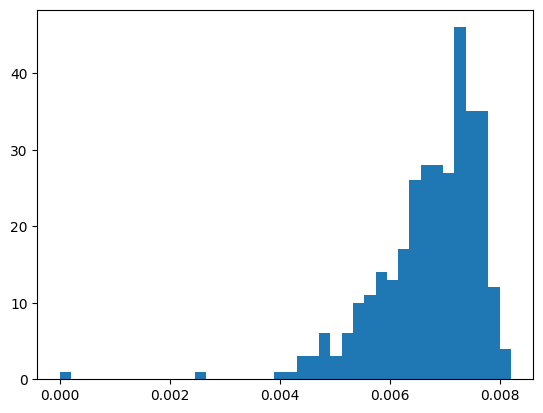

In [ ]:
import matplotlib.pyplot as plt

plt.hist(W_pd.iloc[0], bins=40)

In [ ]:
def mask_top_n(df, n):
    # 各行の値の順位を計算（降順）
    ranks = df.apply(lambda x: x.rank(method='min', ascending=False), axis=1)
    # top N の条件に該当する位置は元の値を保持し、それ以外は 0
    return df.where(ranks <= n, 0)

In [ ]:
W_pd = mask_top_n(W_pd, 5)

In [ ]:
# Tech
threshold = 0.00
tech_list = [
    'AAPL',
    'ADBE',
    'ADI',
    'ADSK',
    'AMAT',
    'AMD',
    'ANSS',
    'AKAM',
    'CSCO',
    'MSFT',
    'ORCL',
    'TXN',
    'NVDA',
    'AMZN'
]

soft_list = [
    'ADBE',
    'ADSK',
    'ANSS',
    'CSCO',
    'ORCL',
]

semc_list = [
    'ADI',
    'AMAT',
    'AMD',
    'TXN',
    'NVDA'
]

W_tech = W_pd.loc[tech_list, tech_list]
W_tech = W_tech*(W_tech>threshold)
W_tech

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AKAM,CSCO,MSFT,ORCL,TXN,NVDA,AMZN
AAPL,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
ADBE,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
ADI,0.0,0.0,0.000000,0.0,0.009787,0.0,0.0,0.0,0.000000,0.000000,0.0,0.011692,0.0,0.0
ADSK,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AMAT,0.0,0.0,0.009787,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.009778,0.0,0.0
AMD,0.0,0.0,0.005044,0.0,0.004991,0.0,0.0,0.0,0.000000,0.000000,0.0,0.005045,0.0,0.0
ANSS,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AKAM,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.005281,0.000000,0.0,0.000000,0.0,0.0
CSCO,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
MSFT,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


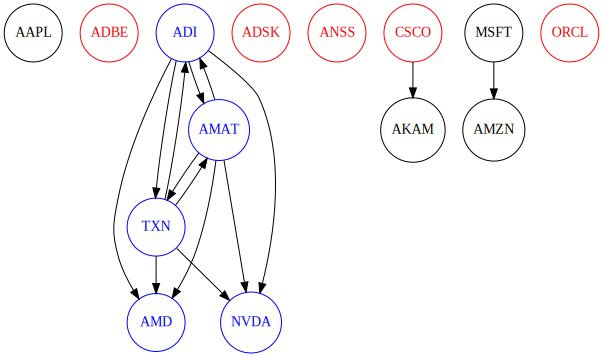

In [ ]:
from graphviz import Digraph

G = Digraph(format="png")
G.attr("node", shape="circle")
for node_name in tech_list:
    col = 'black'
    if node_name in soft_list:col='red'
    if node_name in semc_list:col='blue'
    G.node(node_name, width="0.8", color=col, fontcolor=col)
for r in tech_list:
    for c in tech_list:
        if W_tech.loc[r,c] != 0:
            col = 'black'
            #G.edge(c,r,label=f'{W_tech.loc[r,c]:.3f}', color=col, fontcolor=col)
            G.edge(c,r,fontcolor=col)
G